In [1]:
import matplotlib as mpl
mpl.use('Agg')

import matplotlib.pyplot as plt

import massmapper as mm
import numpy as np
import random

%matplotlib inline

In [2]:
objectivemass=12
masswidth=0.01
catalog_kind='subhalo'
mainbranches=mm.Mainbranches(objectivemass,masswidth,catalog_kind=catalog_kind,n=200)
zarray,massmap=mainbranches.zarray,mainbranches.massmap

# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree

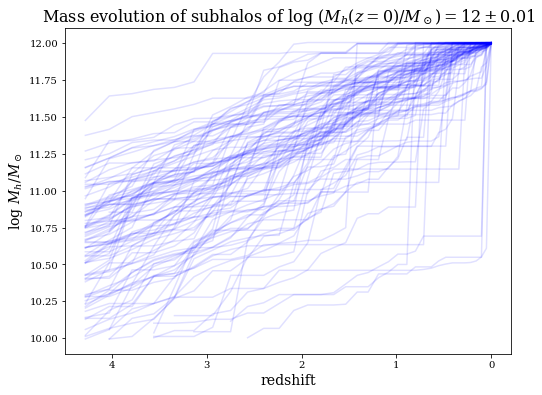

200 subhalos
showing a random sample of 100


In [3]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
for halo, item in enumerate(random.sample(massmap,100)):
    #x=np.arange(35)
    mask=massmap[halo]>0
    ax.plot(zarray[mask],massmap[halo][mask],color='blue',alpha=0.12)
ax.set_xlabel('redshift',fontsize=14)
ax.set_ylabel('log $M_h/M_\odot$',fontsize=14)
#ax.set_title('this is {}'.format('hal'))
ax.set_title('Mass evolution of {0}s of log $(M_h(z=0)/M_\odot)={1:0.0f}\pm {2:0.2f}$'.
             format(catalog_kind,objectivemass,masswidth),fontsize=16)
ax.invert_xaxis()
plt.show()

print('{0:0.0f} {1}s'
     '\nshowing a random sample of 100').format(massmap[:,0].size,catalog_kind)

generating family trees for 200 main progenitors


100% |########################################################################|


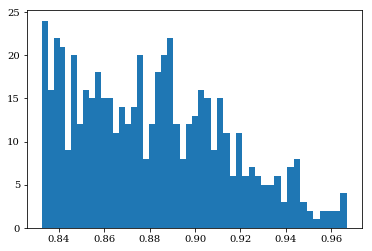

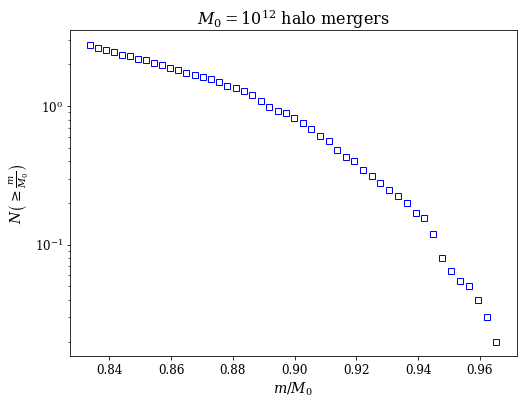

TypeError: 'NoneType' object has no attribute '__getitem__'

In [4]:
mergerratioarray=np.array(mainbranches.gendistribution()[2])

In [ ]:
allmassbranches=mm.Mainbranches(12.,np.inf)

In [ ]:
'''
import h5py
f=h5py.File('/data1/staudt/mergers/allmassmap.hdf5','w')
del f
grp=f.create_group('data')
for snapshot in allmassbranches.snapshotindex:
    grp.create_dataset(str(snapshot),data=allmassbranches.massmap[:,snapshot])
f.close()
'''

In [ ]:
allmassmap=allmassbranches.massmap
accretion01to00=allmassmap[:,0]-allmassmap[:,1]
allm0array=allmassmap[:,0]
ratio=accretion01to00/allm0array
bins=np.logspace(-4,0,40)

logratio=np.log10(ratio)
logbins=np.log10(bins)

mask1=np.isfinite(logratio)
mask2=ratio!=1
mask=mask1*mask2
number=len(np.where(mask)[0])
print number
midlogbins=(logbins[1:]+logbins[:-1])/2

n,logbinsout,patches=plt.hist(logratio[mask],logbins)
plt.show()

print midlogbins

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogy(midlogbins,n)
plt.show()

In [ ]:
print allmassbranches.cat[0]['halo.i'][:5]
print allmassbranches.cat[0]['par.i'][:5]
print allmassbranches.cat[0]['m.max'][:5]
print''
print mainbranches.cat[0]['par.i'][:5]
print mainbranches.cat[1]['chi.i'][0]
print np.where(mainbranches.cat[1]['chi.i']==2)[0]
mainbranches.cat[0]['m.max']